<a href="https://colab.research.google.com/github/sharmadishant04/Stock_Prediction/blob/main/Stock_Prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stock Stock Prediction and EDA of HDFC, KOTAK BANK and IDFC using LSTM

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


I will be looking at stock market data from 2013-2018 of HDFC, IDFC and KOTAK BANK.I will perform EDA and get stock information, visualize different aspects of it, and finally I will also be predicting future stock prices through a Long Short Term Memory (LSTM) method.

While performing EDA, I will try to answer the following questions:



1.   What was the change in price of the stocks over time?
2.   What was the daily return of the stocks on average?
3.   What was the moving average of the stocks?
4.   What is the correlation between different stocks?
5.   How much value do we put at risk by investing in a particular stock?
6.   How can we attempt to predict future stock behavior? (Predicting the closing price stock price of all three companies using LSTM)

Importing Libraries

In [ ]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For time stamps
from datetime import datetime

### ETL

Loading Data

In [ ]:
HDFC=pd.read_csv('/content/HDFC BANK - Sheet1.csv')
KOTAK=pd.read_csv('/content/KOTAK - Sheet1.csv')
IDFC=pd.read_csv('/content/IDFC BANK - Sheet1.csv')

In [ ]:
HDFC.head(10)

,date,open,high,low,close,volume,Name
0,02-12-2018 15:30,930.00,943.00,927.58,938.33,1095277,HDFC
1,2/14/2018 15:30:00,944.90,948.95,937.33,941.58,894297,HDFC
2,2/15/2018 15:30:00,944.85,947.38,937.50,940.95,1228806,HDFC
3,2/16/2018 15:30:00,941.95,947.43,937.83,939.30,895880,HDFC
4,2/19/2018 15:30:00,941.30,943.80,929.53,939.10,913638,HDFC
5,2/20/2018 15:30:00,942.38,942.93,929.40,931.60,1021017,HDFC
6,2/21/2018 15:30:00,933.98,934.28,926.10,928.70,688268,HDFC
7,2/22/2018 15:30:00,925.00,930.00,920.78,926.60,3313399,HDFC
8,2/23/2018 15:30:00,928.45,942.43,925.20,940.28,1019187,HDFC
9,2/26/2018 15:30:00,944.05,957.40,941.78,955.78,1197221,HDFC


In [ ]:
KOTAK.head(10)

,date,open,high,low,close,volume,Name
0,02-12-2018 15:30,1037.5,1046.00,1032.65,1042.95,772861,KOTAK
1,2/14/2018 15:30:00,1050.0,1052.35,1036.80,1042.45,1187333,KOTAK
2,2/15/2018 15:30:00,1043.5,1047.50,1033.00,1042.15,908706,KOTAK
3,2/16/2018 15:30:00,1043.0,1062.00,1040.85,1050.20,1655606,KOTAK
4,2/19/2018 15:30:00,1059.0,1059.00,1046.55,1056.20,1188168,KOTAK
5,2/20/2018 15:30:00,1056.2,1065.40,1041.70,1045.80,835351,KOTAK
6,2/21/2018 15:30:00,1047.7,1060.80,1042.55,1055.05,3572028,KOTAK
7,2/22/2018 15:30:00,1052.5,1077.50,1050.65,1072.50,5142330,KOTAK
8,2/23/2018 15:30:00,1072.5,1083.30,1072.45,1080.85,2272854,KOTAK
9,2/26/2018 15:30:00,1081.0,1109.60,1081.00,1105.15,1817998,KOTAK


In [ ]:
IDFC.head(10)

,date,open,high,low,close,volume,Name
0,02-12-2018 15:30,53.95,54.10,53.55,53.65,7694772,IDFC
1,2/14/2018 15:30:00,53.90,54.60,53.60,53.80,5434151,IDFC
2,2/15/2018 15:30:00,53.85,54.10,52.95,53.25,4994112,IDFC
3,2/16/2018 15:30:00,53.65,53.75,52.40,53.10,10752129,IDFC
4,2/19/2018 15:30:00,53.20,53.20,51.85,52.25,6391763,IDFC
5,2/20/2018 15:30:00,52.70,52.90,52.10,52.20,3366449,IDFC
6,2/21/2018 15:30:00,52.80,52.80,52.00,52.35,3520590,IDFC
7,2/22/2018 15:30:00,52.20,52.20,51.20,51.40,10329078,IDFC
8,2/23/2018 15:30:00,51.65,52.05,51.45,51.95,4621871,IDFC
9,2/26/2018 15:30:00,52.35,52.85,51.80,52.30,4829046,IDFC


Converting data to datetime format

In [ ]:
HDFC['date']= pd.to_datetime(HDFC['date'])
IDFC['date']= pd.to_datetime(IDFC['date'])
KOTAK['date']= pd.to_datetime(KOTAK['date'])


Setting the index as date

In [ ]:
HDFC1= HDFC.set_index('date')
IDFC1= IDFC.set_index('date')
KOTAK1= KOTAK.set_index('date')


### EDA

In [ ]:
# General info
HDFC1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1231 entries, 2018-02-12 15:30:00 to 2023-02-03 15:30:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1231 non-null   float64
 1   high    1231 non-null   float64
 2   low     1231 non-null   float64
 3   close   1231 non-null   float64
 4   volume  1231 non-null   int64  
 5   Name    1231 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 67.3+ KB


In [ ]:
# General info
IDFC1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1231 entries, 2018-02-12 15:30:00 to 2023-02-03 15:30:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1231 non-null   float64
 1   high    1231 non-null   float64
 2   low     1231 non-null   float64
 3   close   1231 non-null   float64
 4   volume  1231 non-null   int64  
 5   Name    1231 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 67.3+ KB


In [ ]:
# General info
KOTAK1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1231 entries, 2018-02-12 15:30:00 to 2023-02-03 15:30:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1231 non-null   float64
 1   high    1231 non-null   float64
 2   low     1231 non-null   float64
 3   close   1231 non-null   float64
 4   volume  1231 non-null   int64  
 5   Name    1231 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 67.3+ KB


In [ ]:
# Summary Stats
HDFC1.describe()

,open,high,low,close,volume
count,1231.000000,1231.000000,1231.000000,1231.000000,1.231000e+03
mean,1267.866799,1280.187498,1254.443160,1267.512372,7.450559e+06
std,222.911525,224.531937,221.985394,223.406220,6.145583e+06
min,770.450000,810.000000,738.750000,767.700000,5.484040e+05
25%,1060.265000,1068.890000,1051.315000,1060.580000,3.342652e+06
50%,1248.950000,1255.000000,1236.350000,1245.600000,5.796311e+06
75%,1473.550000,1489.975000,1461.750000,1477.925000,9.426545e+06
max,1705.000000,1725.000000,1675.000000,1695.500000,4.872548e+07


In [ ]:
# Summary Stats
IDFC1.describe()

,open,high,low,close,volume
count,1231.000000,1231.000000,1231.000000,1231.000000,1.231000e+03
mean,43.527620,44.242445,42.678392,43.432047,2.798170e+07
std,9.692466,9.772231,9.609175,9.670921,2.261789e+07
min,18.500000,19.300000,17.650000,18.150000,2.572108e+06
25%,37.750000,38.250000,36.750000,37.475000,1.298461e+07
50%,43.550000,44.300000,42.850000,43.500000,2.232962e+07
75%,49.750000,50.650000,49.000000,49.700000,3.526832e+07
max,68.000000,69.300000,67.000000,68.200000,2.614180e+08


In [ ]:
# Summary Stats
KOTAK1.describe()

,open,high,low,close,volume
count,1231.000000,1231.000000,1231.000000,1231.000000,1.231000e+03
mean,1578.492689,1597.154468,1557.791998,1577.952193,3.531303e+06
std,281.063769,282.611958,279.282719,280.400814,4.043298e+06
min,1037.500000,1040.900000,1001.000000,1038.800000,1.976090e+05
25%,1318.800000,1334.200000,1301.250000,1316.850000,1.904314e+06
50%,1633.300000,1652.000000,1614.150000,1640.600000,2.719807e+06
75%,1815.000000,1831.200000,1791.100000,1813.875000,3.988616e+06
max,2200.000000,2253.000000,2176.600000,2210.950000,8.385990e+07


###What was the change in price of the stocks overtime?

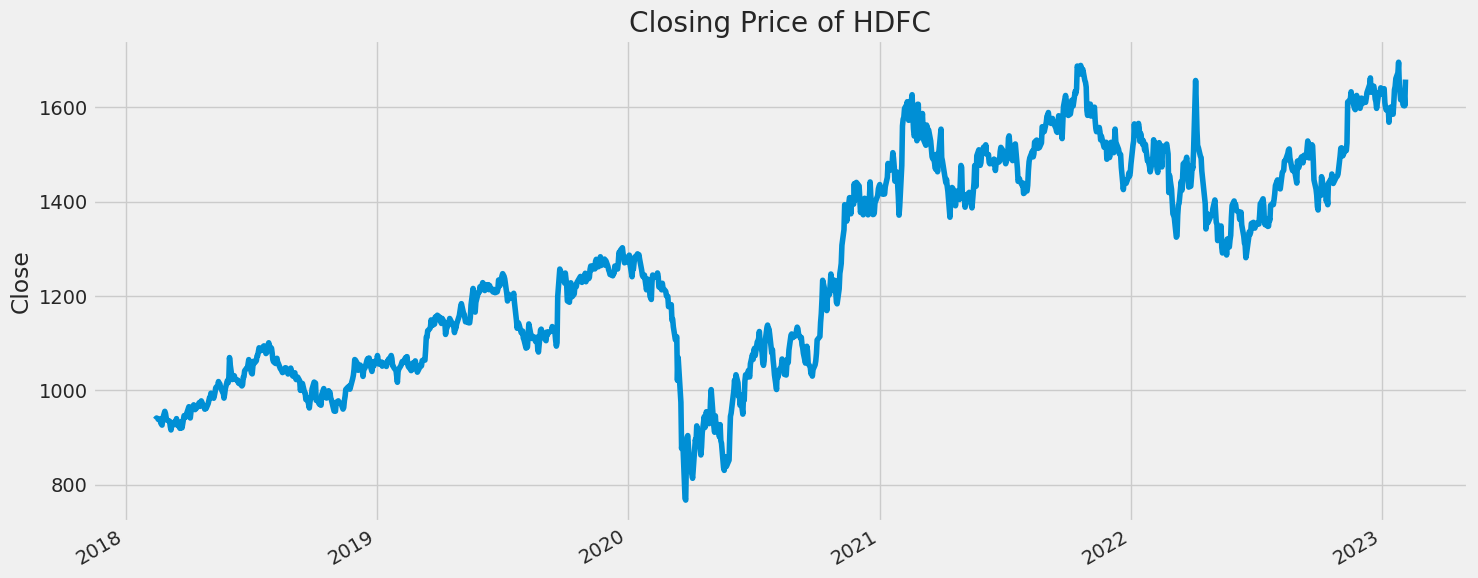

In [ ]:
# Let's see a historical view of the closing price of HDFCe
plt.figure(figsize=(15, 6))
HDFC1['close'].plot()
plt.ylabel('Close')
plt.xlabel(None)
plt.title("Closing Price of HDFC")
plt.tight_layout()

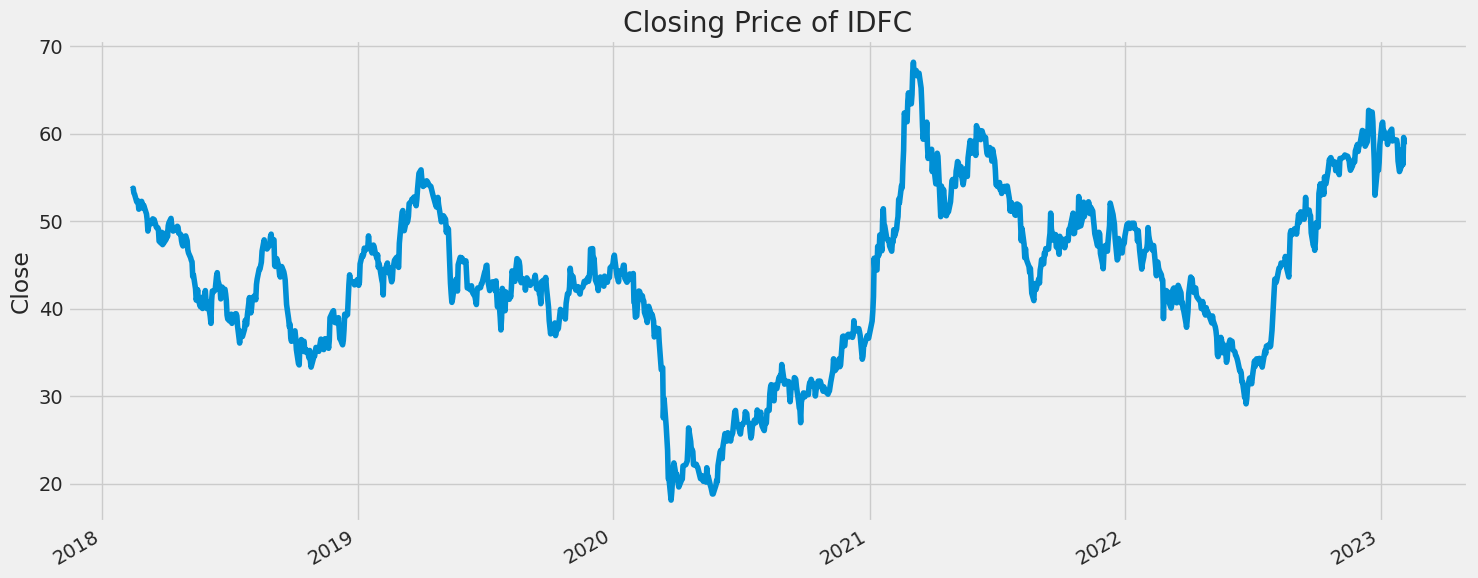

In [ ]:
# Let's see a historical view of the closing price of IDFCe
plt.figure(figsize=(15, 6))
IDFC1['close'].plot()
plt.ylabel('Close')
plt.xlabel(None)
plt.title("Closing Price of IDFC")
plt.tight_layout()

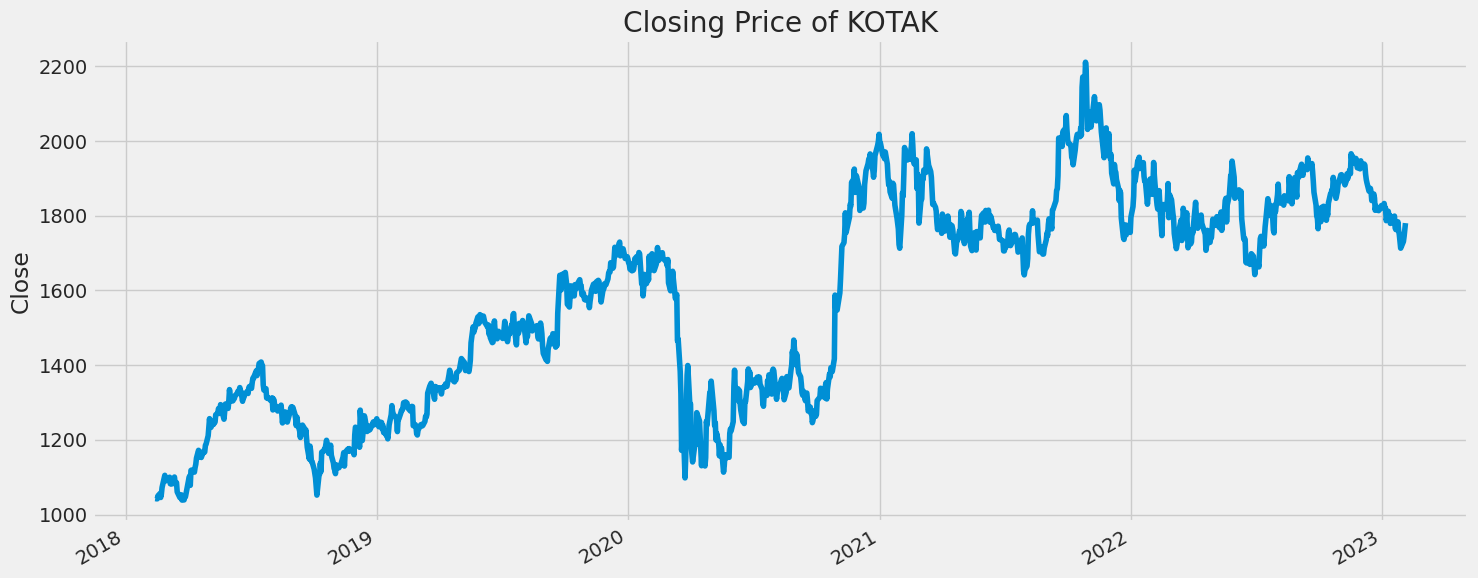

In [ ]:
# Let's see a historical view of the closing price of KOTAK BANK
plt.figure(figsize=(15, 6))
KOTAK1['close'].plot()
plt.ylabel('Close')
plt.xlabel(None)
plt.title("Closing Price of KOTAK")
plt.tight_layout()

### What was the total volume of stock being traded each day?

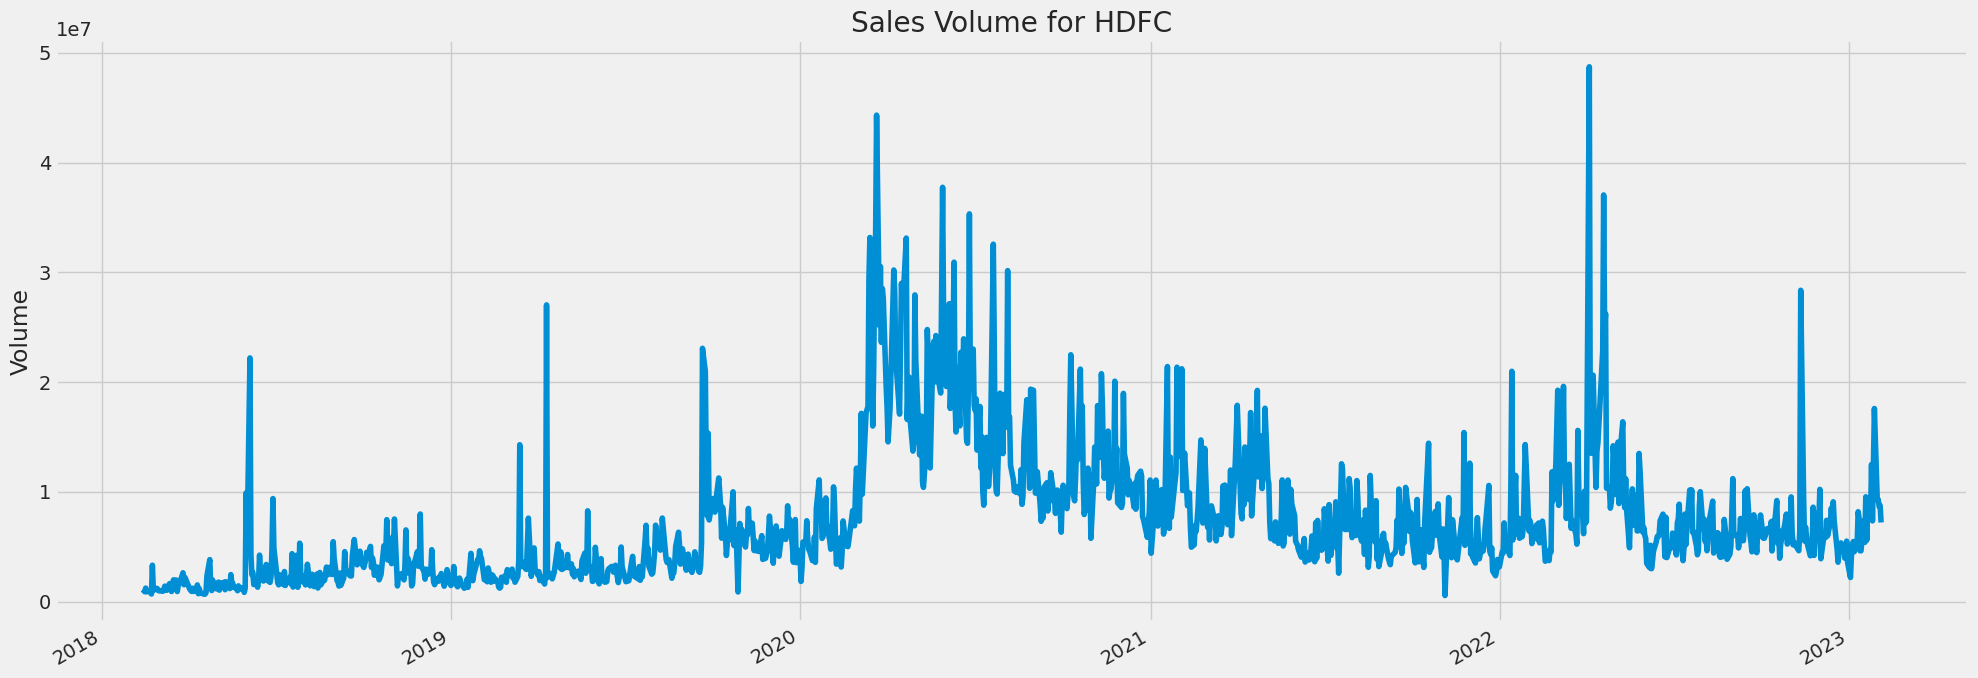

In [ ]:
# Now let's plot the total volume of stock being traded each day of HDFCe
plt.figure(figsize=(20, 7))
HDFC1['volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title("Sales Volume for HDFC")
plt.tight_layout()

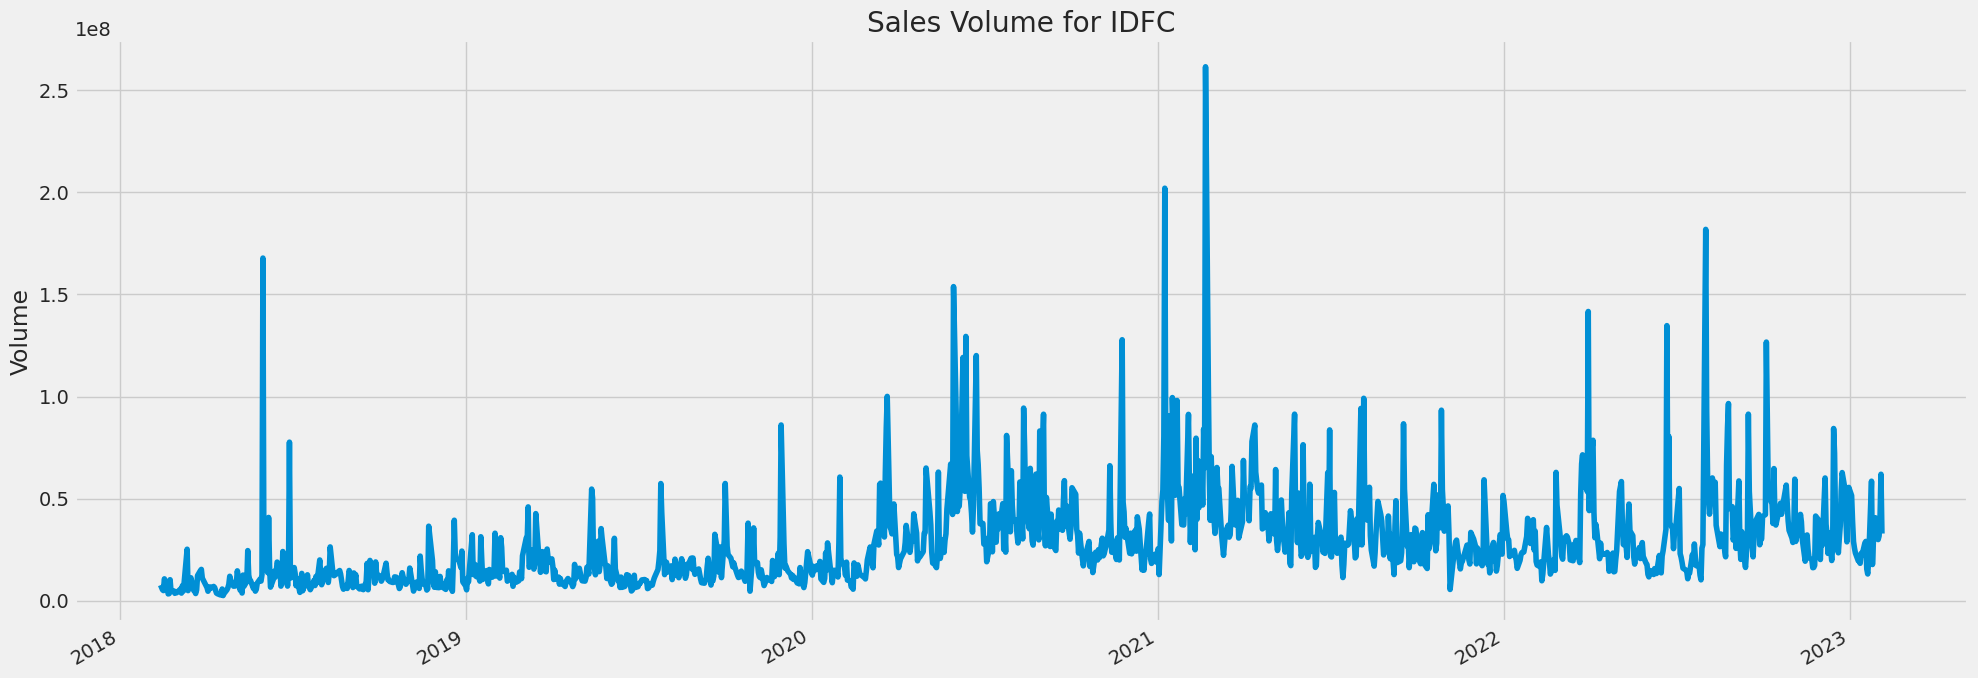

In [ ]:
# Now let's plot the total volume of stock being traded each day of IDFCe
plt.figure(figsize=(20, 7))
IDFC1['volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title("Sales Volume for IDFC")
plt.tight_layout()

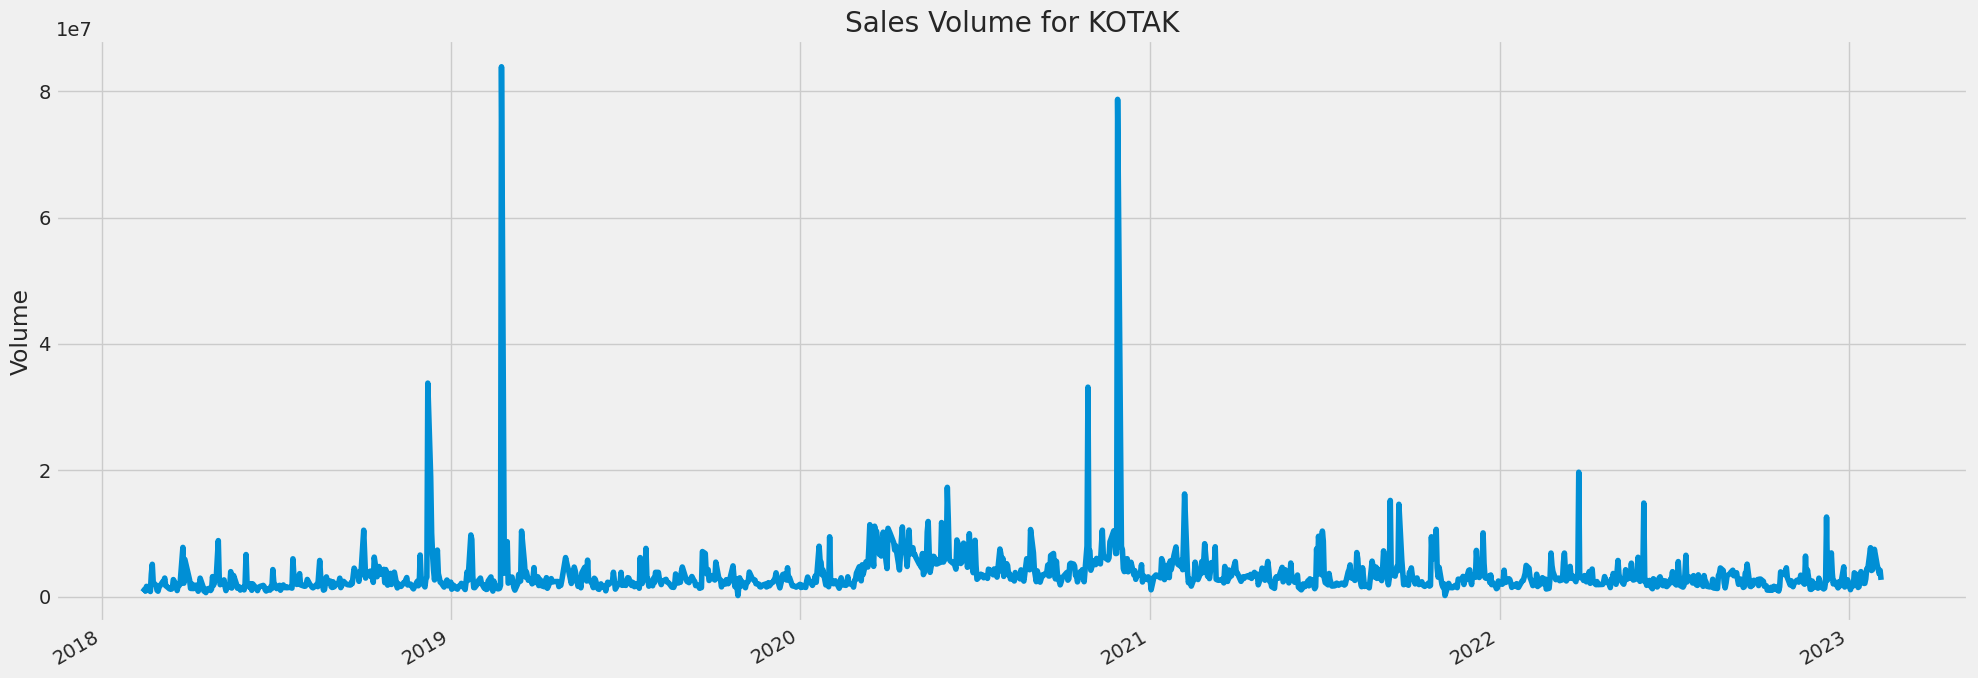

In [ ]:
# Now let's plot the total volume of stock being traded each day of KOTAK BANK
plt.figure(figsize=(20, 7))
KOTAK1['volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title("Sales Volume for KOTAK")
plt.tight_layout()

###What was the moving average of the stocks?

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
      column_name = f"MA for {ma} days"
      HDFC1[column_name] = HDFC1['close'].rolling(ma).mean()
      IDFC1[column_name] = IDFC1['close'].rolling(ma).mean()
      KOTAK1[column_name] = KOTAK1['close'].rolling(ma).mean()

<Figure size 2000x700 with 0 Axes>

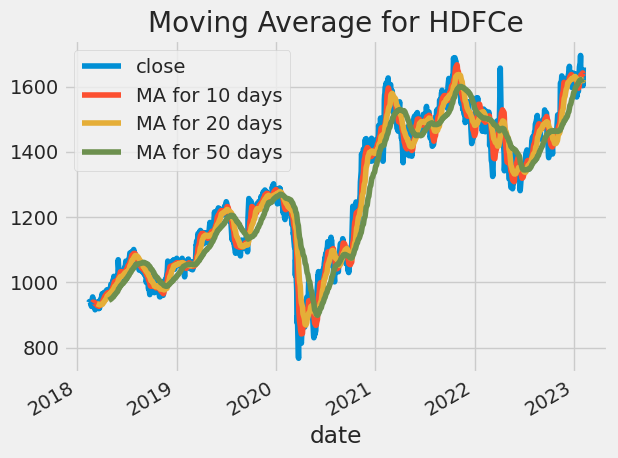

In [ ]:
# Moving average of HDFCe
plt.figure(figsize=(20, 7))
HDFC1[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()
plt.title('Moving Average for HDFCe')
plt.tight_layout()
plt.show()

<Figure size 2000x700 with 0 Axes>

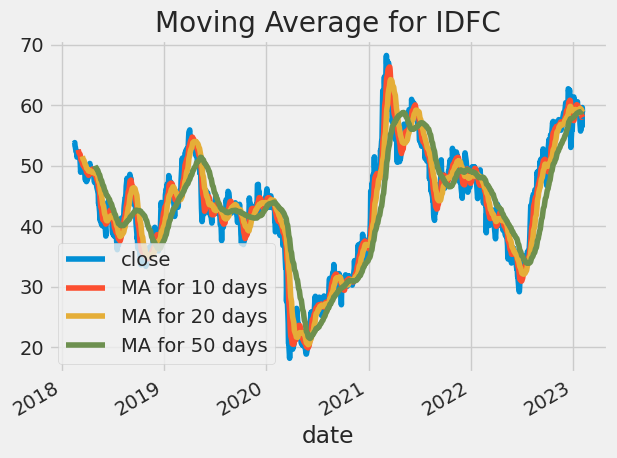

In [ ]:
# Moving average of IDFCe
plt.figure(figsize=(20, 7))
IDFC1[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()
plt.title('Moving Average for IDFC')
plt.tight_layout()
plt.show()

<Figure size 2000x700 with 0 Axes>

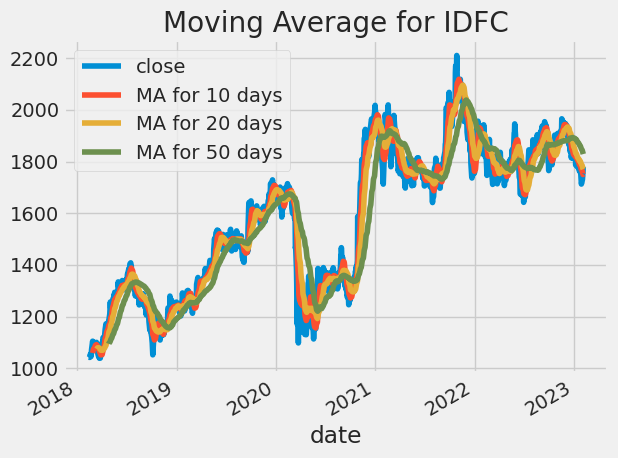

In [ ]:
# Moving average of KOTAK BANK
plt.figure(figsize=(20, 7))
KOTAK1[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()
plt.title('Moving Average for IDFC')
plt.tight_layout()
plt.show()

###What was the daily return of the stocks on average?

In [ ]:
# We'll use pct_change to find the percent change for each day
HDFC1['Daily Return'] = HDFC1['close'].pct_change()
IDFC1['Daily Return'] = IDFC1['close'].pct_change()
KOTAK1['Daily Return'] = KOTAK1['close'].pct_change()

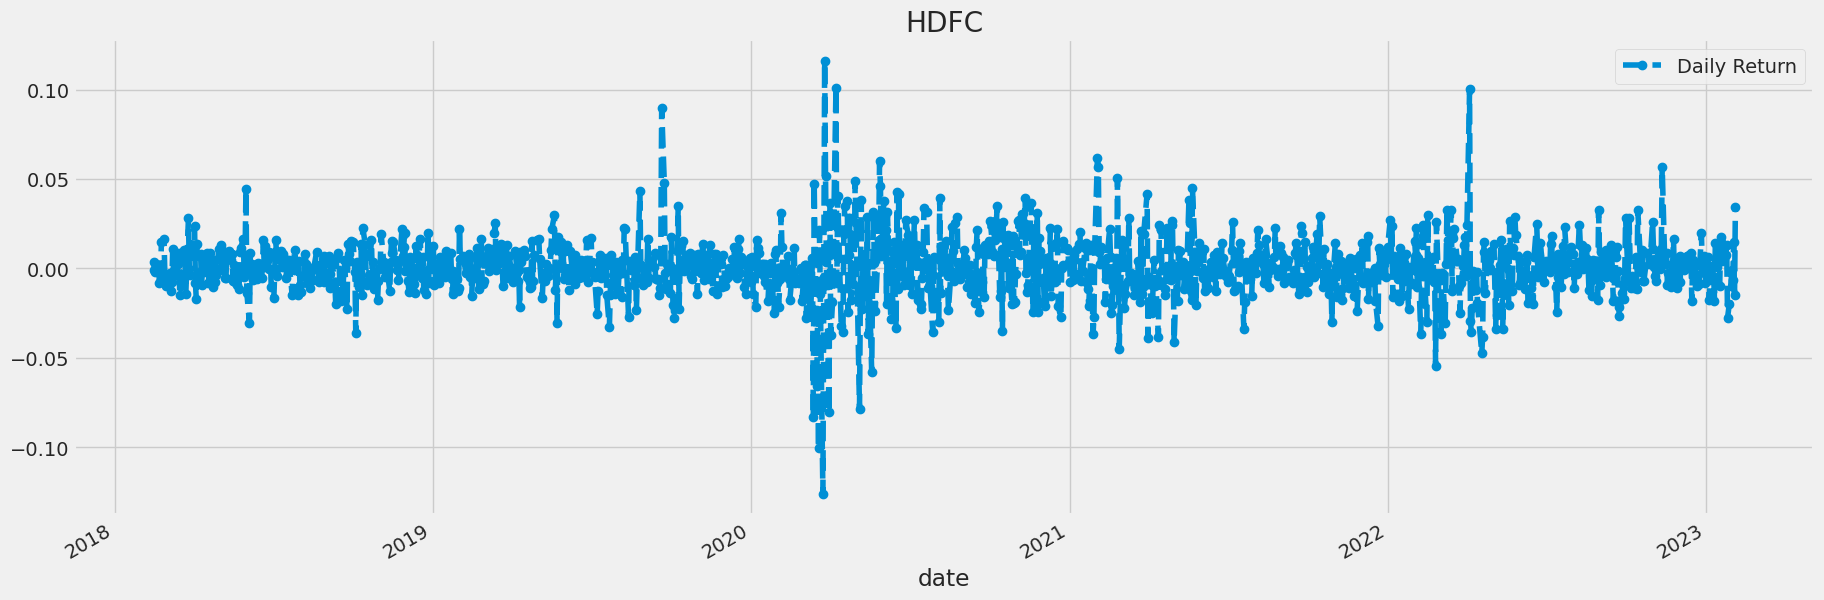

In [ ]:
# Then we'll plot the daily return percentage for HDFCe
plt.figure(figsize=(20, 7))
HDFC1['Daily Return'].plot(legend=True, linestyle='--', marker='o')
plt.title('HDFC')
plt.show()

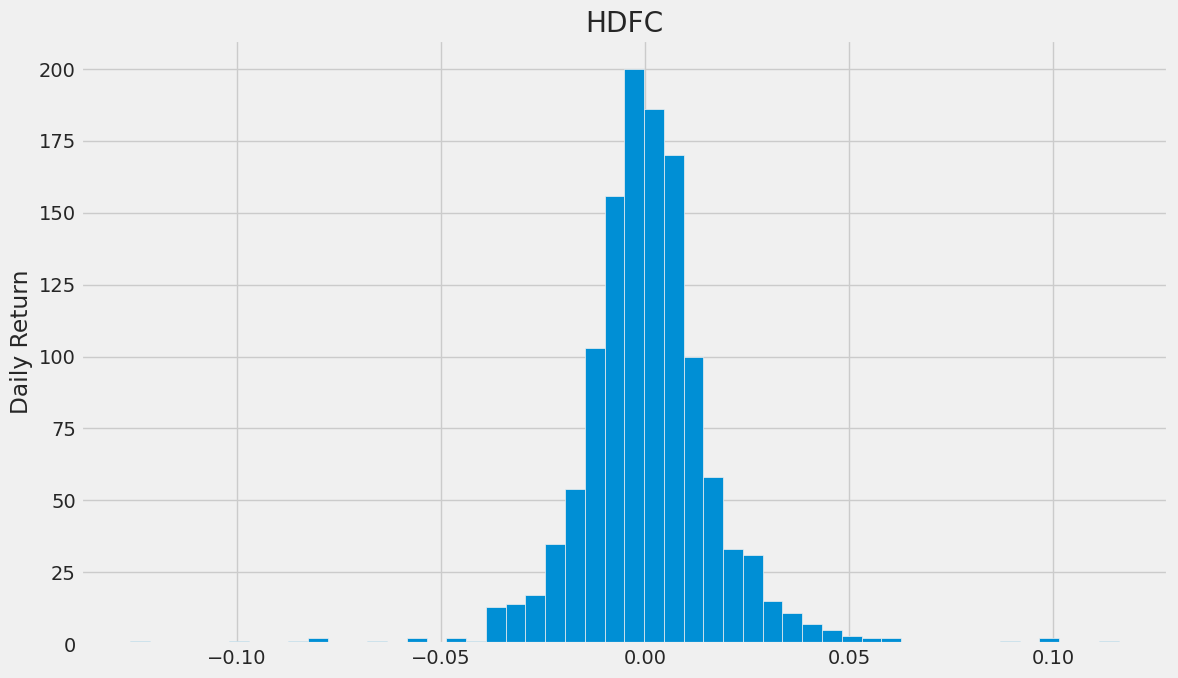

In [ ]:
plt.figure(figsize=(12, 7))
HDFC1['Daily Return'].hist(bins=50)
plt.ylabel('Daily Return')
plt.title('HDFC')
plt.tight_layout()

The average daily return lies anywhere between -0.04% to 0.04%

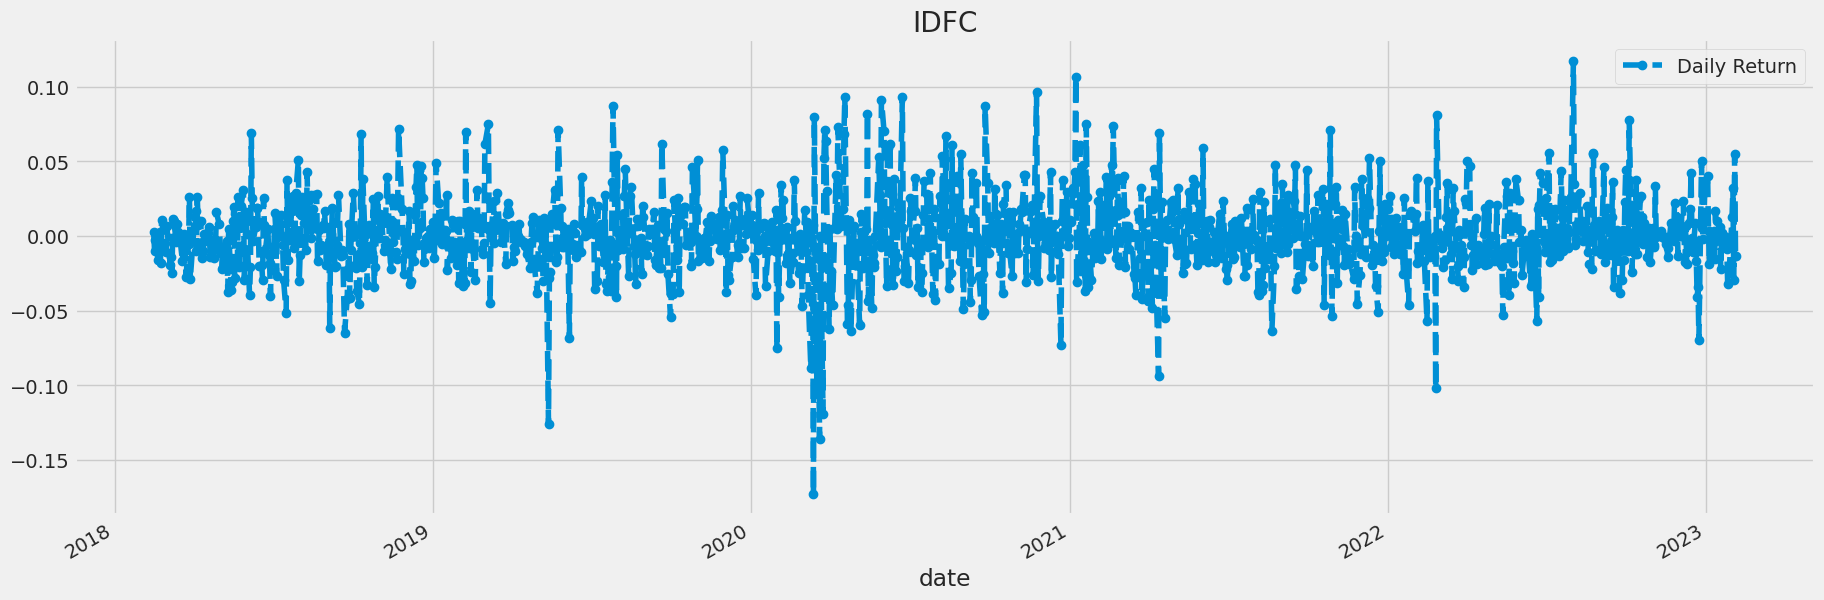

In [ ]:
# Then we'll plot the daily return percentage for IDFCe
plt.figure(figsize=(20, 7))
IDFC1['Daily Return'].plot(legend=True, linestyle='--', marker='o')
plt.title('IDFC')
plt.show()

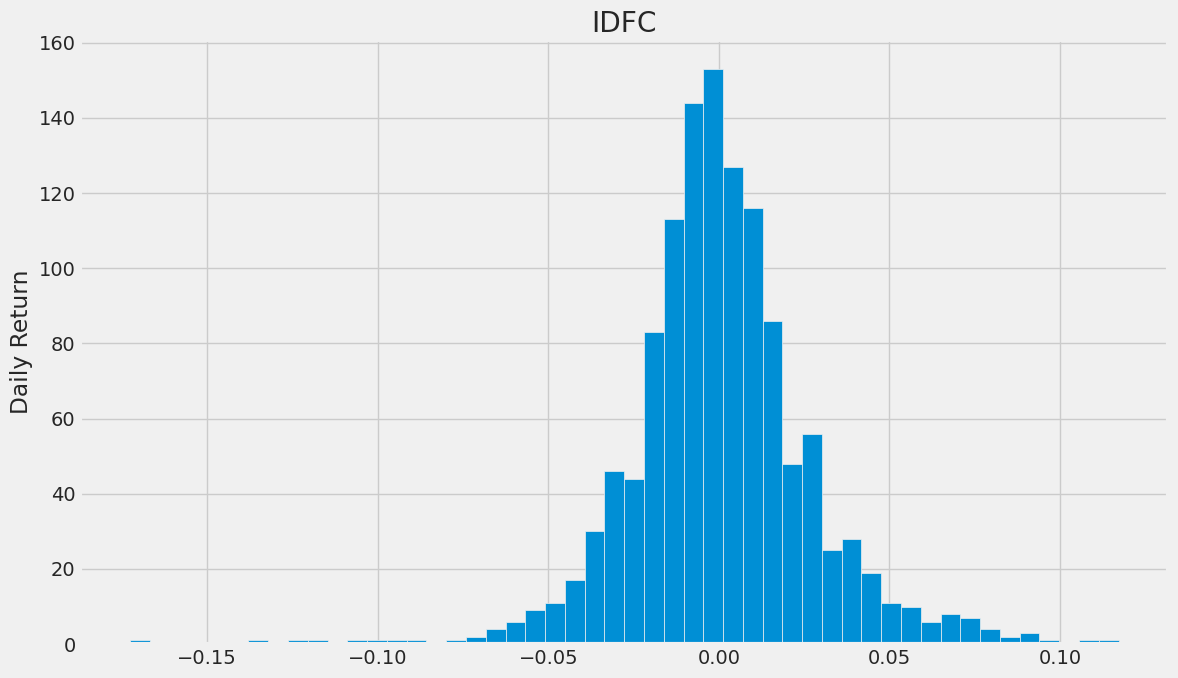

In [ ]:
plt.figure(figsize=(12, 7))
IDFC1['Daily Return'].hist(bins=50)
plt.ylabel('Daily Return')
plt.title('IDFC')
plt.tight_layout()

The average daily return lies anywhere between -0.05% to 0.05%

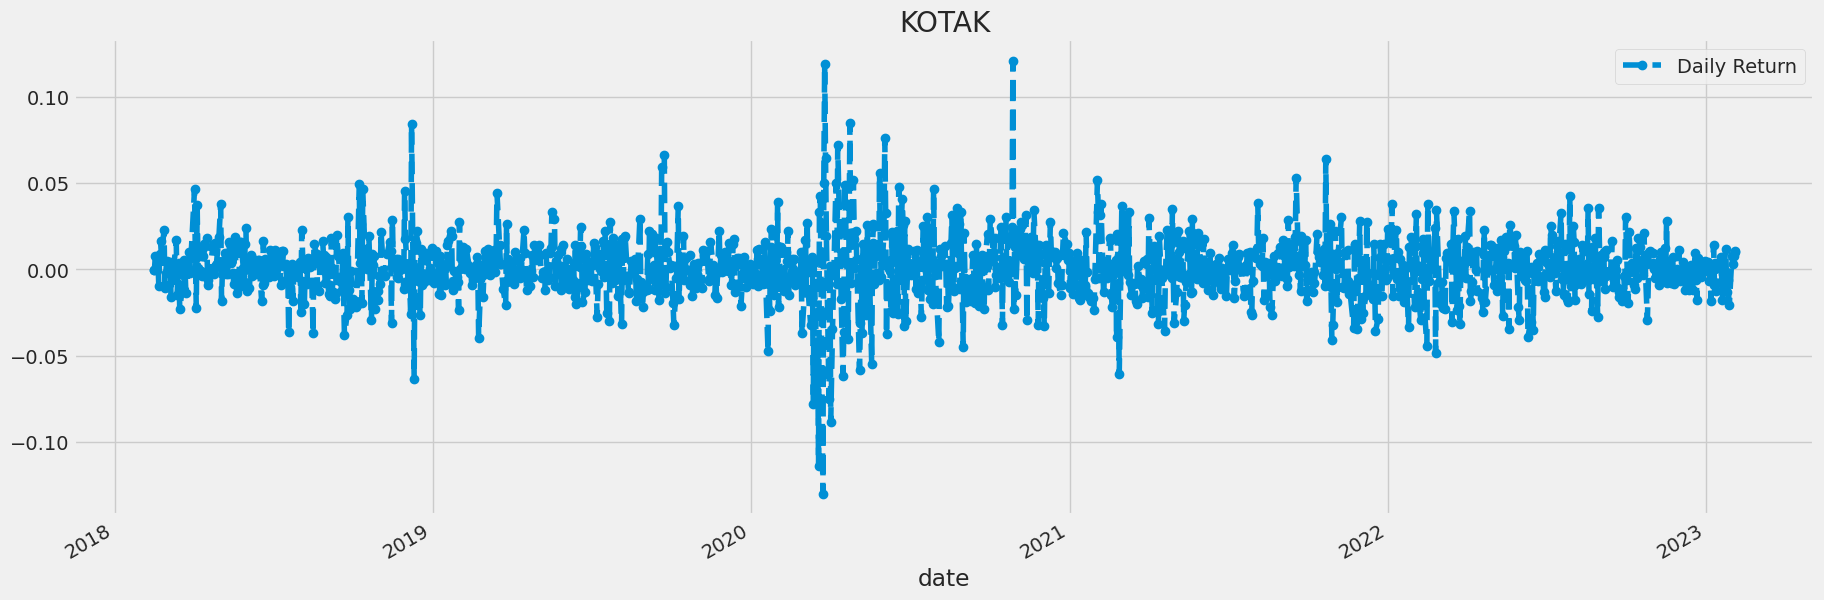

In [ ]:
# Then we'll plot the daily return percentage for KOTAK BANK
plt.figure(figsize=(20, 7))
KOTAK1['Daily Return'].plot(legend=True, linestyle='--', marker='o')
plt.title('KOTAK')
plt.show()

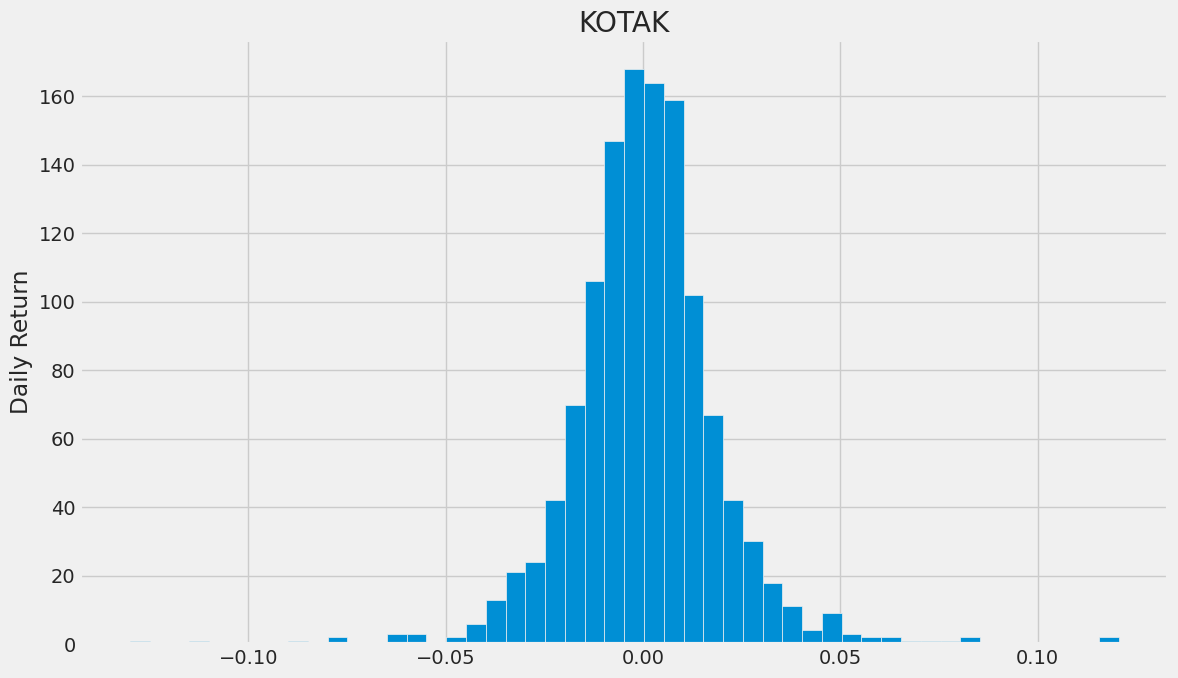

In [ ]:
plt.figure(figsize=(12, 7))
KOTAK1['Daily Return'].hist(bins=50)
plt.ylabel('Daily Return')
plt.title('KOTAK')
plt.tight_layout()

The average daily return lies anywhere between -0.05% to 0.05%

###What is the correlation between different stocks?

In [ ]:
close_HDFC=HDFC[['date','close']]
close_IDFC=IDFC[['date','close']]
close_KOTAK=KOTAK[['date','close']]
close_df=close_HDFC.merge(close_IDFC, left_on='date', right_on='date', suffixes=('_HDFC', '_IDFC'))
close_df1=close_df.merge(close_KOTAK, left_on='date', right_on='date')
close_df1=close_df1.rename(columns={"close_HDFC": "HDFC", "close_IDFC": "IDFC", "close": "KOTAK"})
close_df1=close_df1.set_index('date')

In [ ]:
tech_rets = close_df1.pct_change()
tech_rets.head()

,HDFC,IDFC,KOTAK
date,,,
2018-02-12 15:30:00,NaN,NaN,NaN
2018-02-14 15:30:00,0.003464,0.002796,-0.000479
2018-02-15 15:30:00,-0.000669,-0.010223,-0.000288
2018-02-16 15:30:00,-0.001754,-0.002817,0.007724
2018-02-19 15:30:00,-0.000213,-0.016008,0.005713


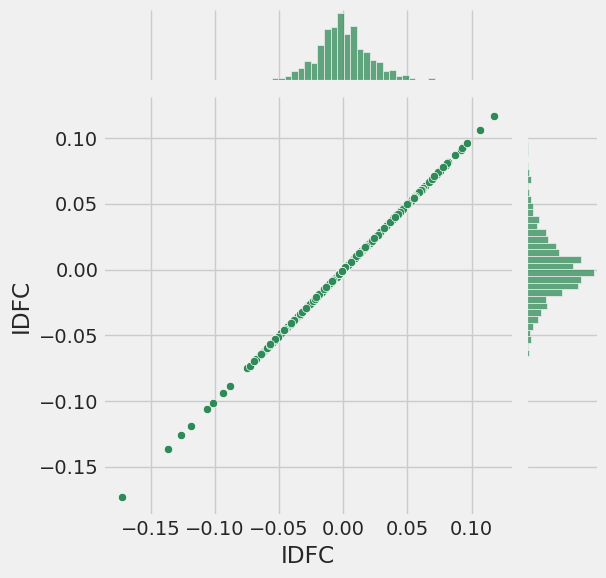

In [ ]:
# Comparing IDFCe to itself should show a perfectly linear relationship
sns.jointplot(x='IDFC', y='IDFC', data=tech_rets, kind='scatter', color='seagreen')

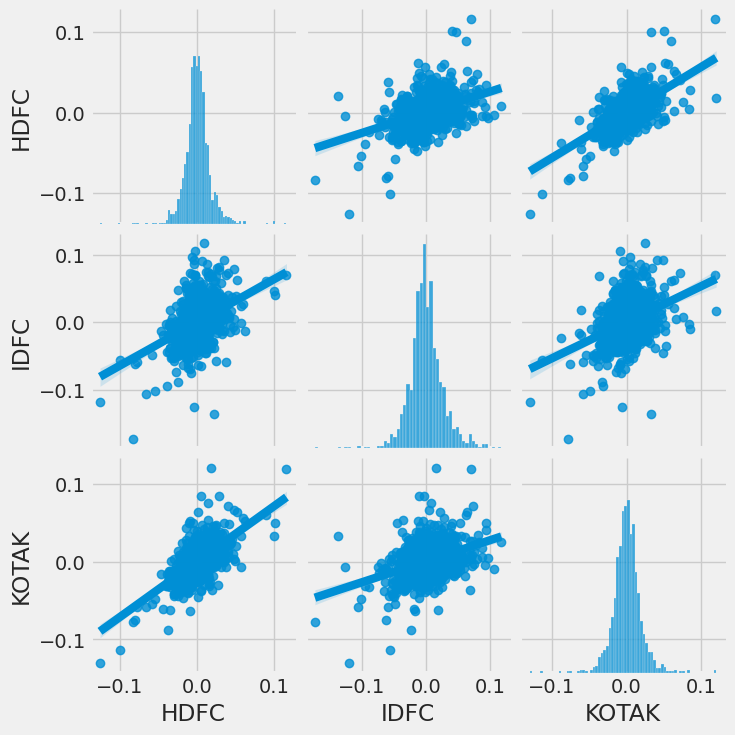

In [ ]:
# Calling pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets, kind='reg')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

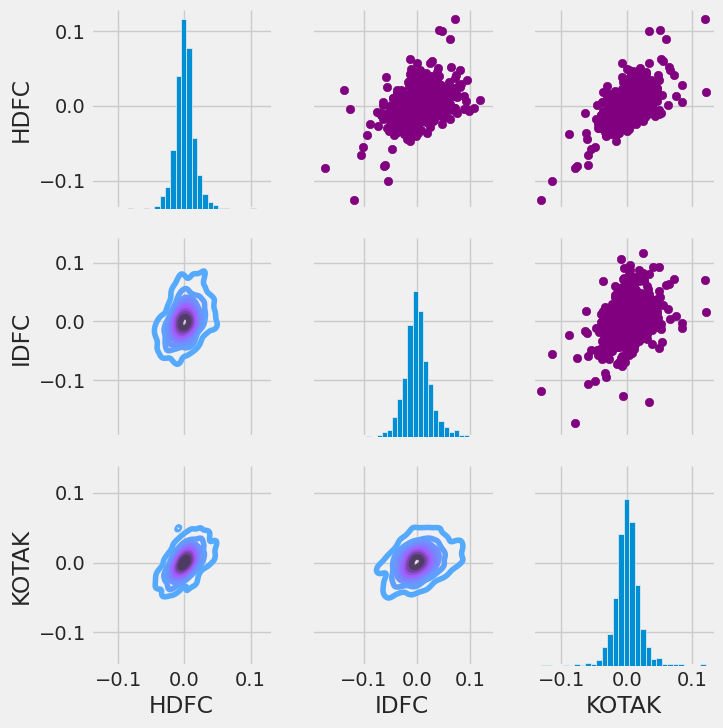

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)


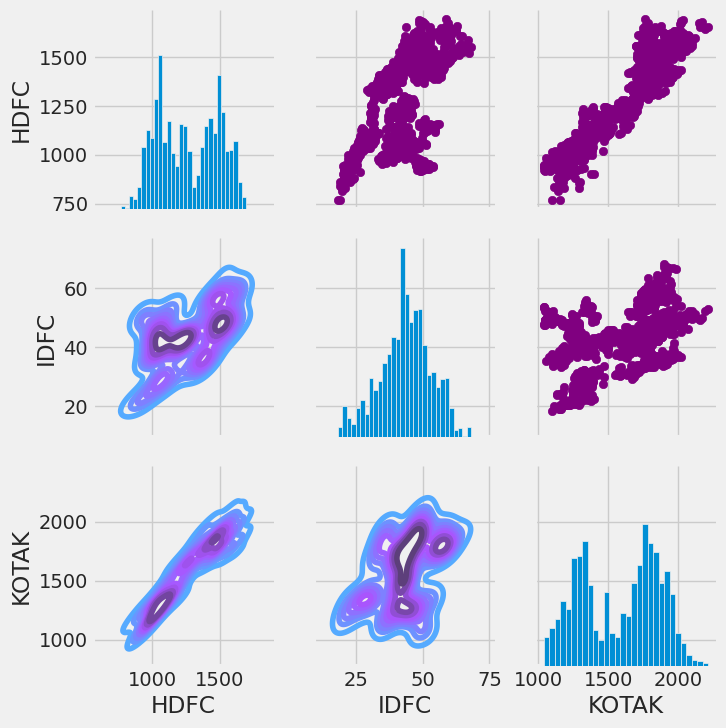

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(close_df1)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

<Axes: >

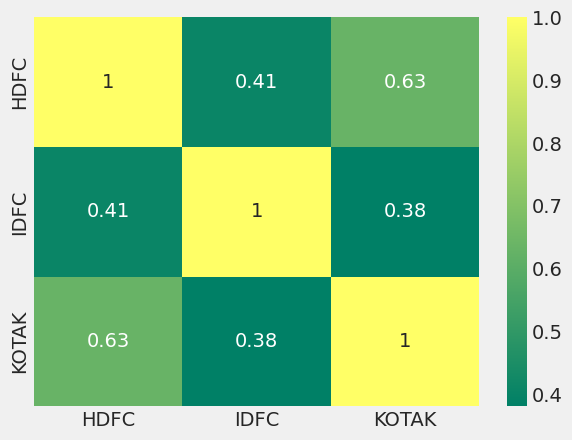

In [ ]:
# correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

By comparing the daily returns, we see an interesting relationship between IDFCe and KOTAK BANK.

<Axes: >

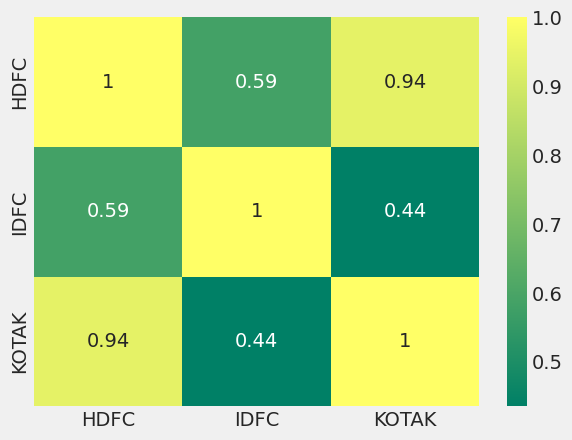

In [ ]:
sns.heatmap(close_df1.corr(), annot=True, cmap='summer')

By comparing the closing prices, we see a strong relationship between all 3 of the companies. It's also interesting to see that all the technology comapnies are positively correlated.

###How much value do we put at risk by investing in a particular stock?

There are many ways to quantify risk, one of the most basic ways using the information gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

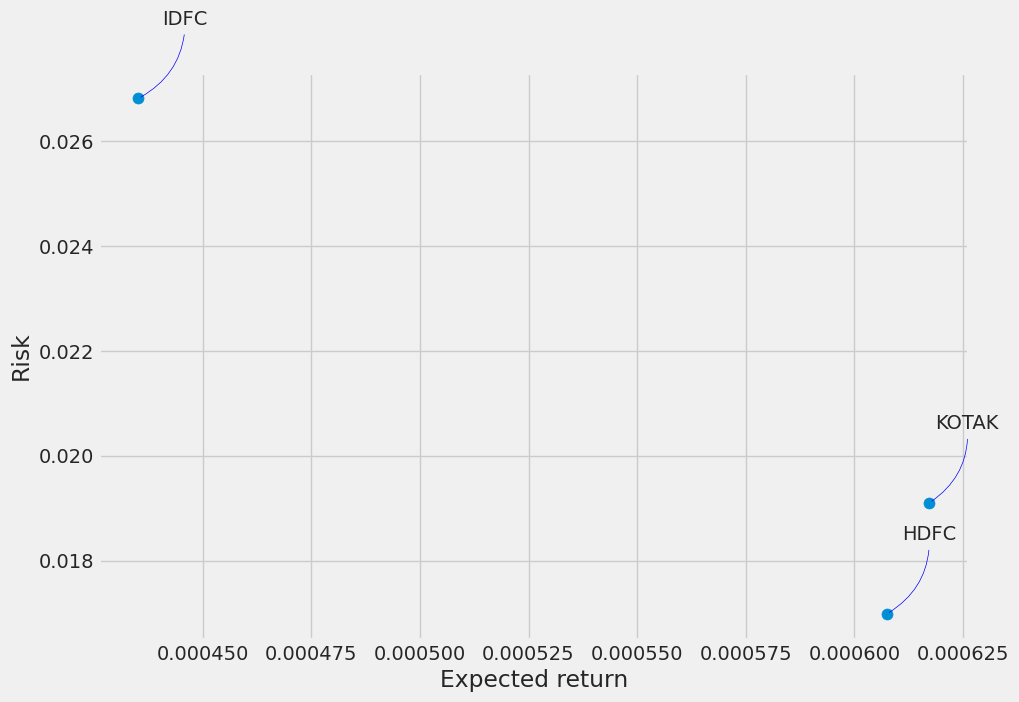

In [ ]:
# Let's start by defining a new DataFrame as a clenaed version of the original tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

While HDFC and KOTAK seem to be a safe and best option for long term investment, with low risk high reward, IDFC is a high risk low reward stock.

###Predicting the closing price stock price of HDFC

In [ ]:
# Create a new dataframe with only the 'close column
data = HDFC1.filter(['close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1170

### Data Transformation

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.18390817],
       [0.18741108],
       [0.18673205],
       ...,
       [0.92676223],
       [0.90067903],
       [0.96044406]])

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.18390817, 0.18741108, 0.18673205, 0.18495365, 0.18473809,
       0.17665445, 0.17352878, 0.17126536, 0.18600992, 0.2027161 ,
       0.19786592, 0.18797155, 0.18266868, 0.18029748, 0.16752533,
       0.16016383, 0.17108213, 0.17011209, 0.17884242, 0.17507006,
       0.17735503, 0.18613925, 0.17115758, 0.16806424, 0.1638823 ,
       0.17433714, 0.17911188, 0.16499246, 0.19296185, 0.19249838,
       0.18899547, 0.21330028, 0.20505497, 0.18746497, 0.2012826 ,
       0.20909679, 0.21753611, 0.20772796, 0.20665014, 0.2120069 ,
       0.20995904, 0.21917439, 0.22262341, 0.21405475, 0.21750377,
       0.22661134, 0.21575771, 0.21534814, 0.20767407, 0.21279371,
       0.20909679, 0.22035999, 0.2339405 , 0.23307825, 0.24417978,
       0.23819789, 0.23262557, 0.2387368 , 0.2464432 , 0.25671481])]
[0.2621039017029533]

[array([0.18390817, 0.18741108, 0.18673205, 0.18495365, 0.18473809,
       0.17665445, 0.17352878, 0.17126536, 0.18600992, 0.2027161 ,
       0.19786592, 0.18797155, 0.182

#### LSTM Model development

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
1110/1110 [==============================] - 20s 8ms/step - loss: 0.0038
Epoch 2/5
1110/1110 [==============================] - 9s 8ms/step - loss: 0.0016
Epoch 3/5
1110/1110 [==============================] - 9s 8ms/step - loss: 0.0012
Epoch 4/5
1110/1110 [==============================] - 10s 9ms/step - loss: 9.3512e-04
Epoch 5/5
1110/1110 [==============================] - 9s 8ms/step - loss: 0.0010


In [ ]:
# Create the testing data set
# Create a new array containing scaled values
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 1s 13ms/step


21.86106257068497

#### Visualizing predictions vs actual close price




<ipython-input-47-920604cb0d15>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


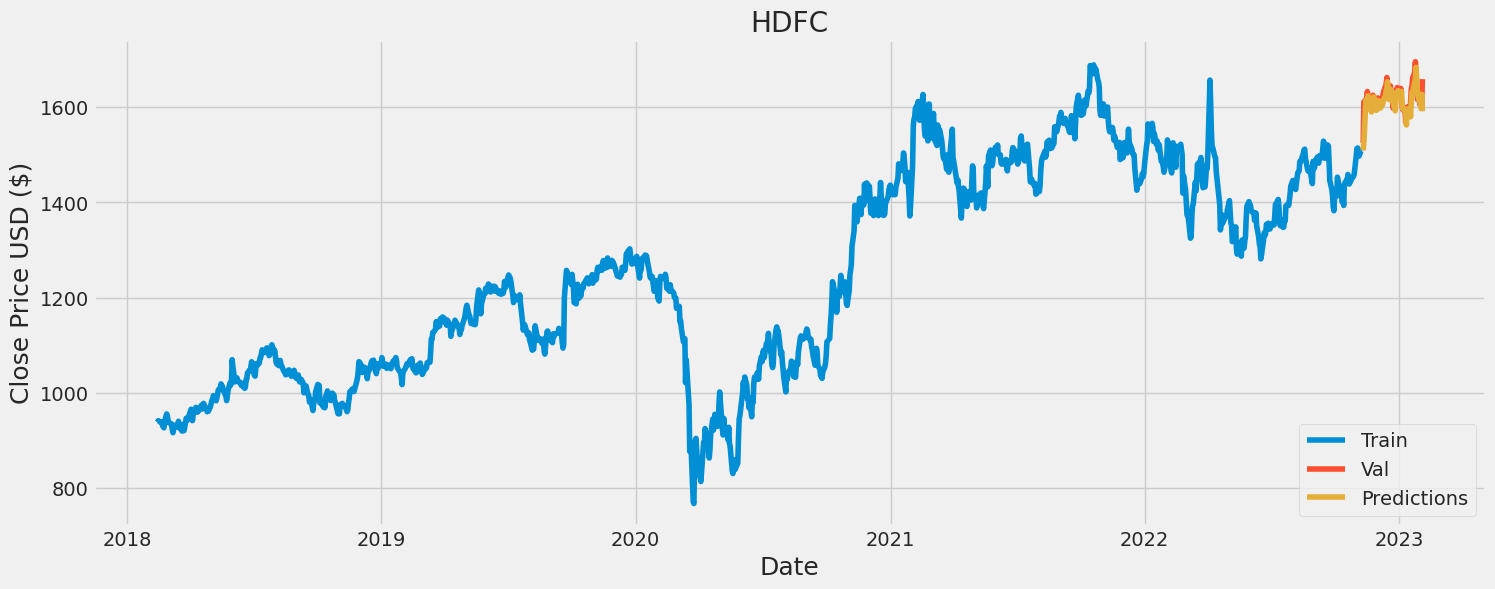

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('HDFC')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

,close,Predictions
date,,
2022-11-10 15:30:00,1524.75,1509.359253
2022-11-11 15:30:00,1611.15,1527.919189
2022-11-14 15:30:00,1615.05,1614.616211
2022-11-15 15:30:00,1619.00,1595.526855
2022-11-16 15:30:00,1632.90,1610.632080
...,...,...
2023-01-30 15:30:00,1614.15,1611.416504
2023-01-31 15:30:00,1603.50,1612.843018
2023-02-01 15:30:00,1627.55,1598.321899


Calculating Percentage change and predicted profits

In [ ]:
# Calculate the difference between the first and last close price and predictions
close_diff = valid['close'].iloc[-1] - valid['close'].iloc[0]
pred_diff = valid['Predictions'].iloc[-1] - valid['Predictions'].iloc[0]

# Calculate the percentage change
close_perc_change = close_diff / valid['close'].iloc[0] * 100
pred_perc_change = pred_diff / valid['Predictions'].iloc[0] * 100

# Print the results
print("Close price difference:", round(close_diff, 2))
print("Close price percentage change:", round(close_perc_change, 2), "%")

print("Predictions difference:", round(pred_diff, 2))
print("Predictions percentage change:", round(pred_perc_change, 2), "%")


Close price difference: 134.05
Close price percentage change: 8.79 %
Predictions difference: 82.04
Predictions percentage change: 5.44 %


###Predicting the closing price stock price of IDFC

In [ ]:
# Create a new dataframe with only the 'close column
data1 = IDFC1.filter(['close'])
# Convert the dataframe to a numpy array
dataset1 = data1.values
# Get the number of rows to train the model on
training_data_len1 = int(np.ceil( len(dataset1) * .95 ))
training_data_len1

1170

### Data Transformation

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler(feature_range=(0,1))
scaled_data1 = scaler1.fit_transform(dataset1)

scaled_data1

array([[0.70929071],
       [0.71228771],
       [0.7012987 ],
       ...,
       [0.76623377],
       [0.82817183],
       [0.81218781]])

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data1 = scaled_data1[0:int(training_data_len1), :]
# Split the data into x_train1 and y_train1 data sets
x_train1 = []
y_train1 = []

for i in range(60, len(train_data1)):
    x_train1.append(train_data1[i-60:i, 0])
    y_train1.append(train_data1[i, 0])
    if i<= 61:
        print(x_train1)
        print(y_train1)
        print()

# Convert the x_train1 and y_train1 to numpy arrays
x_train1, y_train1 = np.array(x_train1), np.array(y_train1)

# Reshape the data
x_train1 = np.reshape(x_train1, (x_train1.shape[0], x_train1.shape[1], 1))

[array([0.70929071, 0.71228771, 0.7012987 , 0.6983017 , 0.68131868,
       0.68031968, 0.68331668, 0.66433566, 0.67532468, 0.68231768,
       0.67732268, 0.66633367, 0.67332667, 0.65334665, 0.63936064,
       0.61438561, 0.62537463, 0.63536464, 0.63136863, 0.63936064,
       0.64235764, 0.64135864, 0.64035964, 0.62337662, 0.62137862,
       0.62237762, 0.61838162, 0.59140859, 0.58641359, 0.61138861,
       0.58341658, 0.5954046 , 0.61138861, 0.6013986 , 0.62637363,
       0.63336663, 0.64335664, 0.62837163, 0.62437562, 0.61438561,
       0.61538462, 0.61738262, 0.61938062, 0.62537463, 0.62337662,
       0.60939061, 0.60639361, 0.59240759, 0.58441558, 0.58041958,
       0.5954046 , 0.6033966 , 0.59240759, 0.57142857, 0.56443556,
       0.55344655, 0.54745255, 0.54445554, 0.51048951, 0.51448551])]
[0.48251748251748244]

[array([0.70929071, 0.71228771, 0.7012987 , 0.6983017 , 0.68131868,
       0.68031968, 0.68331668, 0.66433566, 0.67532468, 0.68231768,
       0.67732268, 0.66633367, 0.67

#### LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model1 = Sequential()
model1.add(LSTM(128, return_sequences=True, input_shape= (x_train1.shape[1], 1)))
model1.add(LSTM(64, return_sequences=False))
model1.add(Dense(25))
model1.add(Dense(1))

# Compile the model
model1.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model1.fit(x_train1, y_train1, batch_size=1, epochs=5)

Epoch 1/5
1110/1110 [==============================] - 18s 12ms/step - loss: 0.0036
Epoch 2/5
1110/1110 [==============================] - 10s 9ms/step - loss: 0.0014
Epoch 3/5
1110/1110 [==============================] - 11s 10ms/step - loss: 0.0011
Epoch 4/5
1110/1110 [==============================] - 9s 8ms/step - loss: 9.4051e-04
Epoch 5/5
1110/1110 [==============================] - 10s 9ms/step - loss: 9.8460e-04


In [ ]:
# Create the testing data set
# Create a new array containing scaled values
test_data1 = scaled_data1[training_data_len1 - 60: , :]
# Create the data sets x_test1 and y_test1
x_test1 = []
y_test1 = dataset1[training_data_len1:, :]
for i in range(60, len(test_data1)):
    x_test1.append(test_data1[i-60:i, 0])

# Convert the data to a numpy array
x_test1 = np.array(x_test1)

# Reshape the data
x_test1 = np.reshape(x_test1, (x_test1.shape[0], x_test1.shape[1], 1 ))

# Get the models predicted price values
predictions1 = model1.predict(x_test1)
predictions1 = scaler1.inverse_transform(predictions1)

# Get the root mean squared error (RMSE)
rmse1 = np.sqrt(np.mean(((predictions1 - y_test1) ** 2)))
rmse1

2/2 [==============================] - 1s 8ms/step


4.029597500240076

#### Visualizing predictions vs actual close price




<ipython-input-55-4e497579a6a6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid1['Predictions'] = predictions1


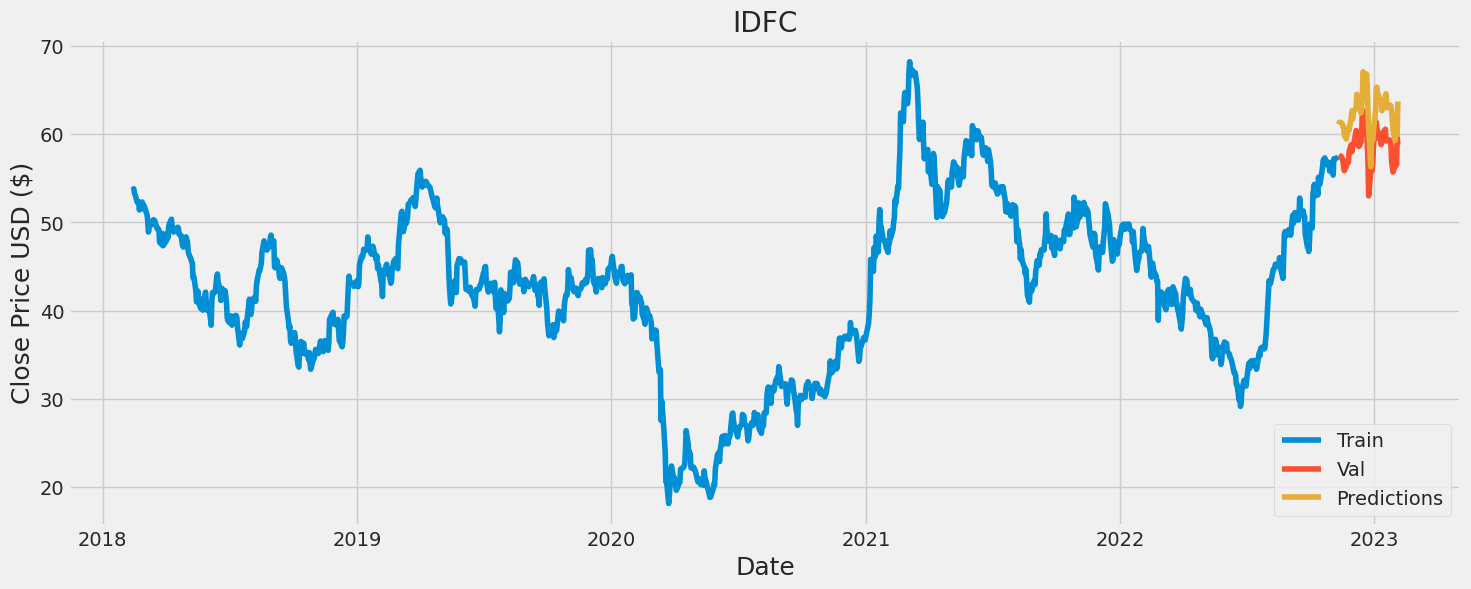

In [ ]:
# Plot the data
train1 = data1[:training_data_len1]
valid1 = data1[training_data_len1:]
valid1['Predictions'] = predictions1
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('IDFC')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train1['close'])
plt.plot(valid1[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid1

,close,Predictions
date,,
2022-11-10 15:30:00,57.60,61.107170
2022-11-11 15:30:00,57.55,61.344627
2022-11-14 15:30:00,57.45,61.281322
2022-11-15 15:30:00,57.15,61.181667
2022-11-16 15:30:00,57.10,60.848160
...,...,...
2023-01-30 15:30:00,56.40,59.277267
2023-01-31 15:30:00,58.20,60.088665
2023-02-01 15:30:00,56.50,62.029449


In [ ]:
# Calculate the difference between the first and last close price and predictions
close_diff = valid1['close'].iloc[-1] - valid1['close'].iloc[0]
pred_diff = valid1['Predictions'].iloc[-1] - valid1['Predictions'].iloc[0]

# Calculate the percentage change
close_perc_change = close_diff / valid1['close'].iloc[0] * 100
pred_perc_change = pred_diff / valid1['Predictions'].iloc[0] * 100

# Print the results
print("Close price difference:", round(close_diff, 2))
print("Close price percentage change:", round(close_perc_change, 2), "%")

print("Predictions difference:", round(pred_diff, 2))
print("Predictions percentage change:", round(pred_perc_change, 2), "%")

Close price difference: 1.2
Close price percentage change: 2.08 %
Predictions difference: 2.59
Predictions percentage change: 4.24 %


###Predicting the closing price stock price of KOTAK BANK

In [ ]:
# Create a new dataframe with only the 'close column
data2 = KOTAK1.filter(['close'])
# Convert the dataframe to a numpy array
dataset2 = data2.values
# Get the number of rows to train the model on
training_data_len2 = int(np.ceil( len(dataset2) * .95 ))

training_data_len2

1170

### Data Transformation

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler2 = MinMaxScaler(feature_range=(0,1))
scaled_data2 = scaler2.fit_transform(dataset2)

scaled_data2

array([[0.0035405 ],
       [0.00311394],
       [0.002858  ],
       ...,
       [0.60222668],
       [0.6167726 ],
       [0.63259822]])

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data2 = scaled_data2[0:int(training_data_len2), :]
# Split the data into x_train2 and y_train2 data sets
x_train2 = []
y_train2 = []

for i in range(60, len(train_data2)):
    x_train2.append(train_data2[i-60:i, 0])
    y_train2.append(train_data2[i, 0])
    if i<= 61:
        print(x_train2)
        print(y_train2)
        print()

# Convert the x_train2 and y_train2 to numpy arrays
x_train2, y_train2 = np.array(x_train2), np.array(y_train2)

# Reshape the data
x_train2 = np.reshape(x_train2, (x_train2.shape[0], x_train2.shape[1], 1))

[array([0.0035405 , 0.00311394, 0.002858  , 0.00972572, 0.01484452,
       0.00597193, 0.01386341, 0.02875059, 0.03587425, 0.05660538,
       0.04628247, 0.04414964, 0.04854328, 0.05221175, 0.03723926,
       0.03950006, 0.03711129, 0.03723926, 0.05272363, 0.0384763 ,
       0.03664207, 0.03996929, 0.01872627, 0.00870196, 0.00554537,
       0.01049354, 0.01215715, 0.        , 0.00046922, 0.00942712,
       0.0076782 , 0.04926844, 0.05502709, 0.03369876, 0.06782408,
       0.0685919 , 0.06778143, 0.06385701, 0.07447852, 0.08173015,
       0.09580685, 0.11372265, 0.10753743, 0.09823828, 0.09819562,
       0.09729983, 0.11107793, 0.10851853, 0.11009683, 0.12532526,
       0.12792731, 0.14699484, 0.18602568, 0.16614768, 0.16606236,
       0.17595871, 0.17322868, 0.18116282, 0.17804888, 0.19494092])]
[0.19860939299577696]

[array([0.0035405 , 0.00311394, 0.002858  , 0.00972572, 0.01484452,
       0.00597193, 0.01386341, 0.02875059, 0.03587425, 0.05660538,
       0.04628247, 0.04414964, 0.04

#### LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model2 = Sequential()
model2.add(LSTM(128, return_sequences=True, input_shape= (x_train2.shape[1], 1)))
model2.add(LSTM(64, return_sequences=False))
model2.add(Dense(25))
model2.add(Dense(1))

# Compile the model
model2.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model2.fit(x_train2, y_train2, batch_size=1, epochs=5)

Epoch 1/5
1110/1110 [==============================] - 12s 7ms/step - loss: 0.0039
Epoch 2/5
1110/1110 [==============================] - 10s 9ms/step - loss: 0.0018
Epoch 3/5
1110/1110 [==============================] - 12s 11ms/step - loss: 0.0015
Epoch 4/5
1110/1110 [==============================] - 10s 9ms/step - loss: 0.0012
Epoch 5/5
1110/1110 [==============================] - 9s 8ms/step - loss: 0.0012


In [ ]:
# Create the testing data set
# Create a new array containing scaled values
test_data2 = scaled_data2[training_data_len2 - 60: , :]
# Create the data sets x_test2 and y_test2
x_test2 = []
y_test2 = dataset2[training_data_len2:, :]
for i in range(60, len(test_data2)):
    x_test2.append(test_data2[i-60:i, 0])

# Convert the data to a numpy array
x_test2 = np.array(x_test2)

# Reshape the data
x_test2 = np.reshape(x_test2, (x_test2.shape[0], x_test2.shape[1], 1 ))

# Get the models predicted price values
predictions2 = model2.predict(x_test2)
predictions2 = scaler2.inverse_transform(predictions2)

# Get the root mean squared error (RMSE)
rmse2 = np.sqrt(np.mean(((predictions2 - y_test2) ** 2)))
rmse2

2/2 [==============================] - 1s 8ms/step


30.446723492121762

#### Visualizing predictions vs actual close price

<ipython-input-63-e840134e6044>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid2['Predictions'] = predictions2


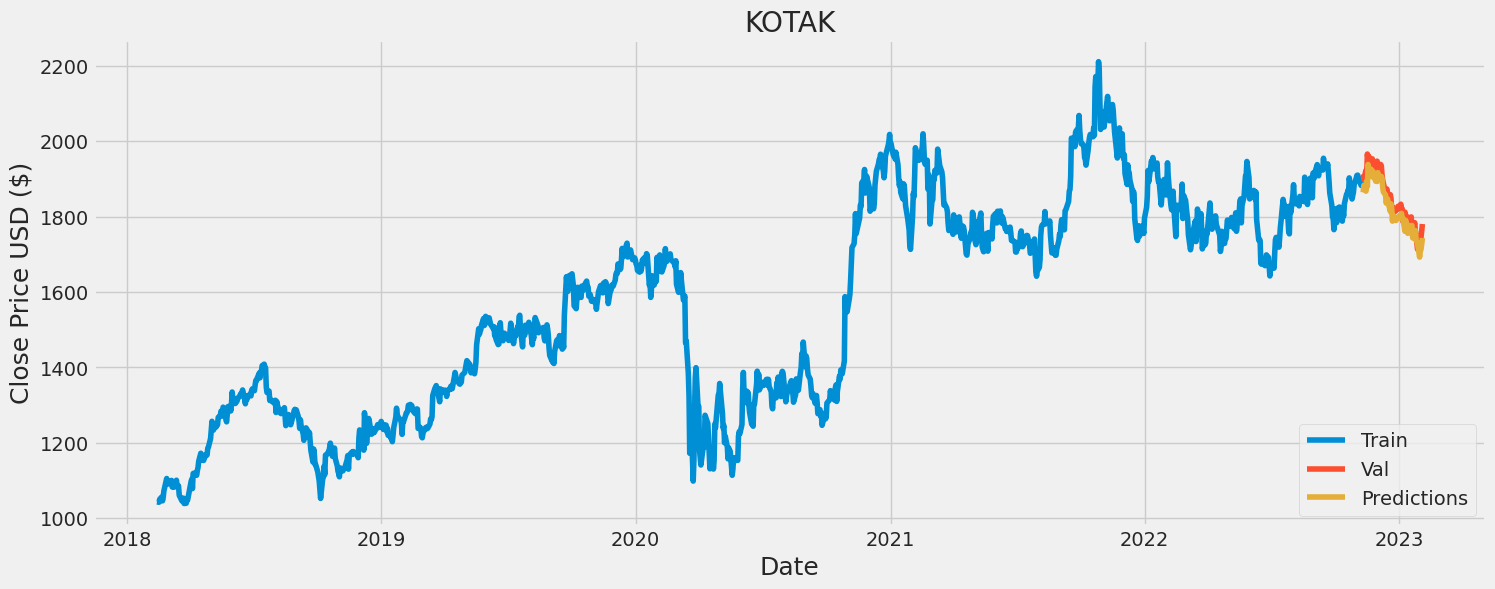

In [ ]:
# Plot the data
train2 = data2[:training_data_len2]
valid2 = data2[training_data_len2:]
valid2['Predictions'] = predictions2
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('KOTAK')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train2['close'])
plt.plot(valid2[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid2

,close,Predictions
date,,
2022-11-10 15:30:00,1912.15,1864.281250
2022-11-11 15:30:00,1899.10,1882.976807
2022-11-14 15:30:00,1922.80,1867.404907
2022-11-15 15:30:00,1912.40,1894.055298
2022-11-16 15:30:00,1965.90,1879.762695
...,...,...
2023-01-30 15:30:00,1726.25,1692.347290
2023-01-31 15:30:00,1731.00,1708.567505
2023-02-01 15:30:00,1744.70,1712.857666


In [ ]:
# Calculate the difference between the first and last close price and predictions
close_diff = valid2['close'].iloc[-1] - valid2['close'].iloc[0]
pred_diff = valid2['Predictions'].iloc[-1] - valid2['Predictions'].iloc[0]

# Calculate the percentage change
close_perc_change = close_diff / valid2['close'].iloc[0] * 100
pred_perc_change = pred_diff / valid2['Predictions'].iloc[0] * 100

# Print the results
print("Close price difference:", round(close_diff, 2))
print("Close price percentage change:", round(close_perc_change, 2), "%")

print("Predictions difference:", round(pred_diff, 2))
print("Predictions percentage change:", round(pred_perc_change, 2), "%")

Close price difference: -131.85
Close price percentage change: -6.9 %
Predictions difference: -121.06
Predictions percentage change: -6.49 %


#Results

| BANK NAME  | ACTUAL % CHANGE | PREDICTED % CHANGE | DIFFERENCE (Actual-Predicted) |
|------------|-----------------|--------------------|-------------------------------|
| HDFC BANK  | 8.79 %          | 6.01 %             | 2.78                          |
| KOTAK BANK | 2.08 %          | 4.36 %             | -2.28                         |
| IDFC BANK  | -6.9 %          | -6.98 %            | -0.08                         |

